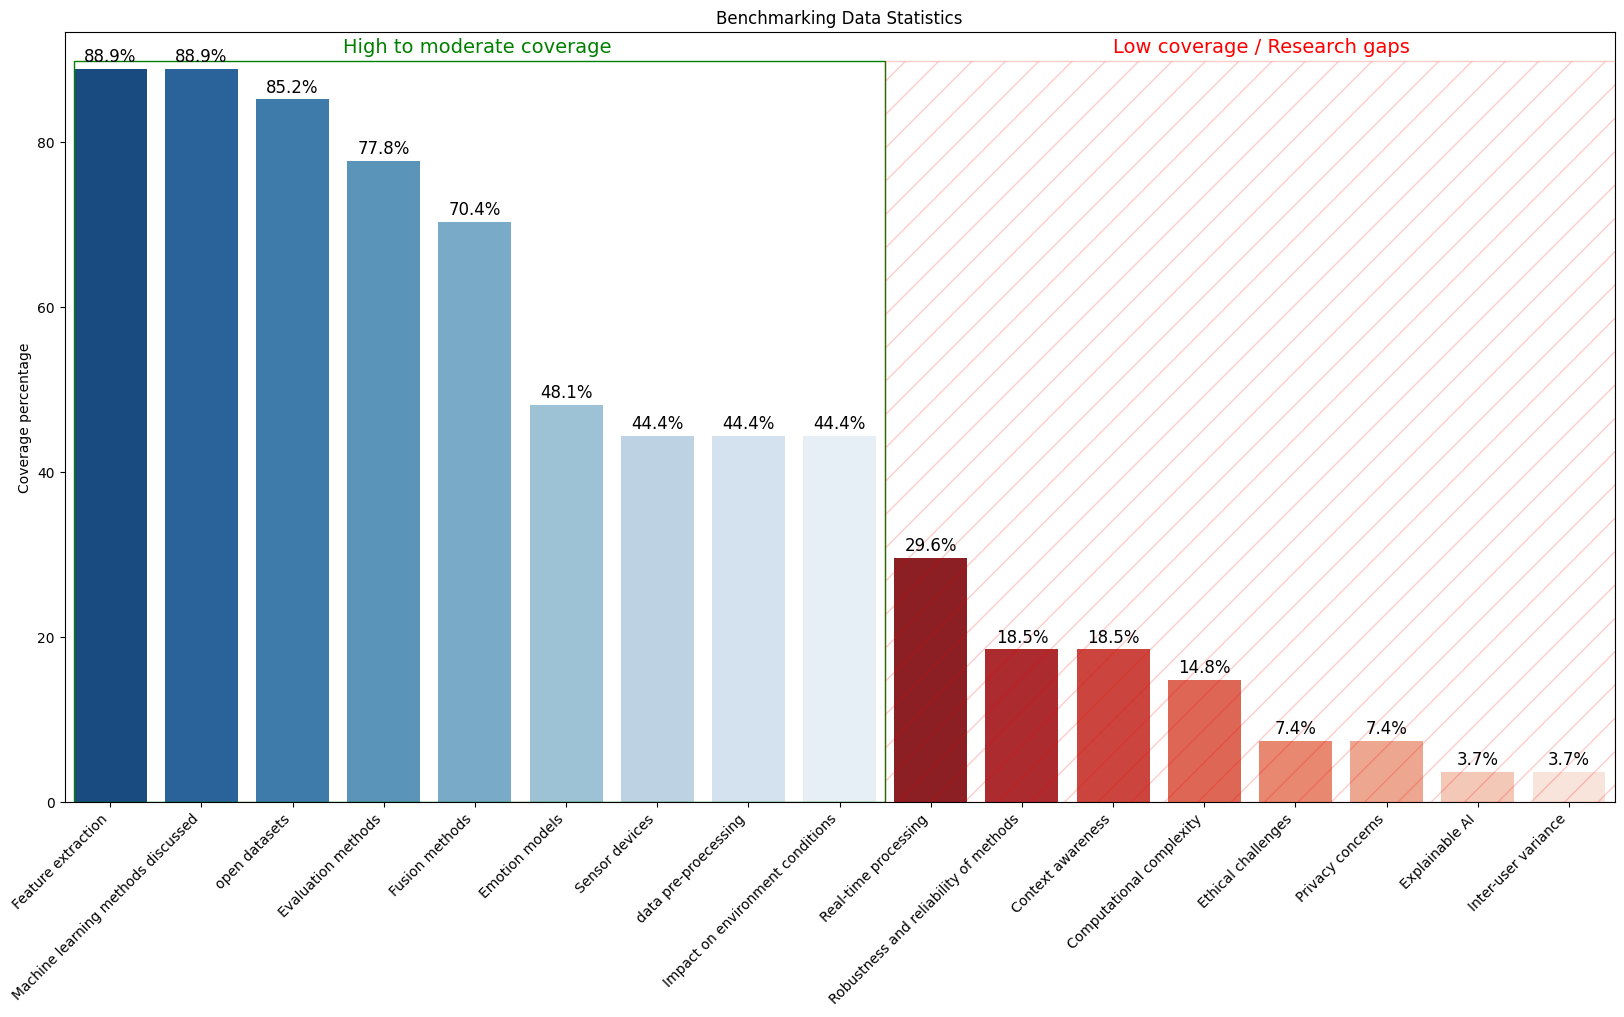

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load and process data
data = pd.read_excel('dataset.xlsx')
excluded = ["Study", "Visual", "Audio", "Text", "Physiological", "General (G)/Specific (S)","MMF","Main Cues"]
df = pd.DataFrame(data, columns=[x for x in data.columns if x not in excluded])
stats = df.iloc[:, 1:-1].sum()

# Calculate the correct coverage percentage for each column
stats_percentage = (stats / df.shape[0]) * 100

# Group columns based on their frequency
low_freq = stats <= 10
high_coverage_stats = stats[~low_freq].sort_values(ascending=False)
low_coverage_stats = stats[low_freq].sort_values(ascending=False)

# Calculate high_coverage_stats_percentage and low_coverage_stats_percentage
high_coverage_stats_percentage = (high_coverage_stats / df.shape[0]) * 100
low_coverage_stats_percentage = (low_coverage_stats / df.shape[0]) * 100

# Calculate the high and low coverage start and end positions
high_coverage_start = -0.4
high_coverage_end = len(high_coverage_stats)-0.5
low_coverage_start = high_coverage_end
low_coverage_end = high_coverage_end + len(low_coverage_stats)

# Create a custom color palette
palette = sns.color_palette('viridis', 2)

# Assign colors to columns based on their frequency
column_colors = [palette[0]] * len(high_coverage_stats) + [palette[1]] * len(low_coverage_stats)

# Create color gradients based on frequency values
color_gradients_high = sns.color_palette("Blues_r", len(high_coverage_stats))
color_gradients_low = sns.color_palette("Reds_r", len(low_coverage_stats))

# Assign color gradients to columns based on their frequency
column_colors_gradient = color_gradients_high + color_gradients_low

# Visualize statistics using bar plots with color gradients and data labels
plt.figure(figsize=(20, 10))
bars = sns.barplot(x=high_coverage_stats_percentage.index.tolist() + low_coverage_stats_percentage.index.tolist(), 
                   y=high_coverage_stats_percentage.values.tolist() + low_coverage_stats_percentage.values.tolist(), 
                   palette=column_colors_gradient)
plt.xticks(rotation=90)
plt.ylabel('Coverage percentage')
plt.title('Benchmarking Data Statistics')

for i, p in enumerate(bars.patches):
    plt.gca().annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                       va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add bounding rectangles, labels, and legend
max_percentage = max(high_coverage_stats_percentage.values.tolist() + low_coverage_stats_percentage.values.tolist())
rect_high_new = patches.Rectangle((high_coverage_start, 0), high_coverage_end - high_coverage_start, max_percentage + 1,
                                  linewidth=1, edgecolor='green', facecolor='none')
rect_low_new = patches.Rectangle((low_coverage_start, 0), low_coverage_end - low_coverage_start, max_percentage + 1, 
                                 linewidth=1, edgecolor='red', facecolor='none', hatch='/', alpha=0.2)

# Rotate x-axis tick labels by -45 degrees
plt.xticks(rotation=45,ha='right')

plt.gca().add_patch(rect_high_new)
plt.gca().add_patch(rect_low_new)
plt.text((high_coverage_start + high_coverage_end) / 2 - 1.5, max_percentage + 2, 'High to moderate coverage',
         fontsize=14, color='green')
plt.text((low_coverage_start + low_coverage_end) / 2 - 1.5, max_percentage + 2, 'Low coverage / Research gaps',
         fontsize=14, color='red')

plt.show()


In [18]:
import pandas as pd
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Dictionary to map acronyms to their groups
acronym_groups = {
    "EEG": "Physiological",
    "EDA": "Physiological",
    "ECG": "Physiological",
    "EMG": "Physiological",
    "PPG": "Physiological",
    "HR": "Physiological",
    "GSR": "Physiological",
    "EOG": "Physiological",
    "RB": "Physiological",
    "RR": "Physiological",
    "SK": "Physiological",
    "Th": "Physiological",
    "FNIS": "Physiological",
    "fMRI": "Physiological",
    "BVP": "Physiological",
    "TMP": "Physiological",
    "BP" : "Physiological",
    "rPPG":"Visual",
    "Sac": "Visual",
    "EF": "Visual",
    "PD": "Visual",
    "BLK": "Visual",
    "FER": "Visual",
    "EMov": "Visual",
    "PF": "Visual",
    "BGF": "Visual",
    "MEL": "Physiological",
    "VT": "Audio",
    "AR": "Audio",
    "MFCC": "Audio",
    "PSD": "Audio",
    "PrF": "Audio",
    "VQF": "Audio",
    "SF": "Audio",
    "PTH": "Audio",
    "INT": "Audio",
    "TON": "Audio",
    "TR": "Text",
    "WE": "Text",
    "LEX": "Text",
    "EGM":"Physiological",
    "OHS":"Text",
    "Prosodic Features":"Audio",
    "GA": "Visual",
    "BM":"Visual",
    "STE":"Audio",
    "Emov":"Visual",
    "EGA":"Physiological",
    "MPCC": "Audio"
}

group_colors = {
    'Text': 'rgba(255, 99, 71, 0.8)',  
    'Visual': 'rgba(135, 206, 250, 0.8)', 
    'Audio': 'rgba(255, 215, 0, 0.8)',  
    'Physiological': 'rgba(50, 205, 50, 0.8)' 
}

data = pd.read_excel('dataset.xlsx')
# Split MMF and Main Cues by comma
data['MMF'] = data['MMF'].apply(lambda x: [item.strip() for item in x.split(',')])
data['Main Cues'] = data['Main Cues'].apply(lambda x: [item.strip() for item in x.split(',')])

# Create a new DataFrame to store the split values
split_data = data.explode('MMF').explode('Main Cues')
# Assign each Main Cue to its corresponding group
split_data['Group'] = split_data['Main Cues'].map(acronym_groups)

# Calculate the coverage and percentage for each group
group_coverage = split_data['Group'].value_counts()
group_percentage = (group_coverage / group_coverage.sum()) * 100
group_percentage = group_percentage.sort_values(ascending=False)

# Sort the group_percentage DataFrame by values in descending order
sorted_group_percentage = group_percentage.sort_values(ascending=False)

# Create the bar plot
fig2 = go.Figure()

# Define the colors and shades for each group
colors = {
    'Text': 'rgba(255, 99, 71, 0.8)', 
    'Visual': 'rgba(135, 206, 250, 0.8)', 
    'Audio': 'rgba(255, 215, 0, 0.8)', 
    'Physiological': 'rgba(50, 205, 50, 0.8)' 
}

for group in sorted_group_percentage.index:
    color = colors[group]
    group_data = sorted_group_percentage[sorted_group_percentage.index == group]
    fig2.add_trace(go.Bar(x=group_data.index, y=group_data.values, name=group, marker_color=color))

# Update the layout
fig2.update_layout(
    xaxis_title='Main Cues Group',
    yaxis_title='Coverage percentage',
    barmode='group',
    showlegend=False
)

fig2.show()




In [31]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


acronym_dictionary = {
    "EEG": "Physiological",
    "EDA": "Physiological",
    "ECG": "Physiological",
    "EMG": "Physiological",
    "PPG": "Physiological",
    "HR": "Physiological",
    "GSR": "Physiological",
    "EOG": "Physiological",
    "RB": "Physiological",
    "RR": "Physiological",
    "SK": "Physiological",
    "Th": "Physiological",
    "FNIS": "Physiological",
    "fMRI": "Physiological",
    "BVP": "Physiological",
    "TMP": "Physiological",
    "BP" : "Physiological",
    "rPPG":"Visual",
    "Sac": "Visual",
    "EF": "Visual",
    "PD": "Visual",
    "BLK": "Visual",
    "FER": "Visual",
    "EMov": "Visual",
    "PF": "Visual",
    "BGF": "Visual",
    "MEL": "Physiological",
    "VT": "Audio",
    "AR": "Audio",
    "MFCC": "Audio",
    "PSD": "Audio",
    "PrF": "Audio",
    "VQF": "Audio",
    "SF": "Audio",
    "PTH": "Audio",
    "INT": "Audio",
    "TON": "Audio",
    "TR": "Text",
    "WE": "Text",
    "LEX": "Text",
    "EGM":"Physiological",
    "OHS":"Text",
    "Prosodic Features":"Audio",
    "GA": "Visual",
    "BM":"Visual",
    "STE":"Audio",
    "Emov":"Visual",
    "EGA":"Physiological",
    "MPCC": "Audio",
    "IBI": "Physiological",
    "NoF": "Visual",
    "PRV": "Visual",
    "SPE": "Visual",
    "BR": "Visual",
    "BA": "Visual",
    "BD": "Visual",
    "FF": "Visual",
    "SA": "Visual",
    "SD": "Visual",
    "NoS": "Visual",
    "SV": "Visual",
    "SPV": "Visual",
    "GZ": "Visual",
    "PL": "Visual",
    "MO": "Visual",
    "EBr": "Visual",
    "WC": "Text",
    "GSS": "Audio",
    "Jit": "Audio",
    "Shm": "Audio",
    "Amp": "Audio",
    "Eng": "Audio",
    "LSF": "Audio",
    "AC": "Audio",
    "TxF": "Visual",
    "GF": "Visual",
    "SL": "Text",
    "MEG": "Physiological",
    "Voc": "Audio",
    "HRV": "Physiological",
    "MT": "Physiological",
    "HMov": "Visual",
    "FP": "Physiological",
    "HP": "Visual",
    "SPH": "Audio",
    "IMG": "Visual",
    "SPG": "Audio",
    "zEMG": "Physiological"
}

group_colors = {
    'Text': 'rgba(255, 99, 71, 0.8)',  # Red
    'Visual': 'rgba(135, 206, 250, 0.8)',  # Sky Blue
    'Audio': 'rgba(255, 215, 0, 0.8)',  # Gold
    'Physiological': 'rgba(50, 205, 50, 0.8)'  # Lime Green
}

data = pd.read_excel('dataset.xlsx')

# Split MMF and Main Cues by comma
data['MMF'] = data['MMF'].apply(lambda x: [item.strip() for item in x.split(',')])
data['Main Cues'] = data['Main Cues'].apply(lambda x: [item.strip() for item in x.split(',')])

data = data.dropna(subset=['Cues combination'])

# Create a new DataFrame to store the split values
split_data = data.explode('Main Cues')

# Assign each Main Cue to its corresponding group
split_data['Group'] = split_data['Main Cues'].map(acronym_dictionary)

# Calculate the coverage and percentage for each Main Cue
main_cues_coverage = split_data['Main Cues'].value_counts()
total_studies_count = len(data)  # This line has been modified to use the original 'data' DataFrame
main_cues_percentage = main_cues_coverage / total_studies_count * 100

# Drop duplicates and create a new dataframe with Main Cues, percentages, and groups
split_data_unique = split_data.drop_duplicates(subset='Main Cues')
percentage_and_group = pd.DataFrame({'Percentage': main_cues_percentage, 'Group': split_data_unique.set_index('Main Cues')['Group']})

# Create the bar plot
fig2 = go.Figure()

# Find the cue with the highest percentage in each group
highest_percentage_cues = {
    group: percentage_and_group[percentage_and_group['Group'] == group]['Percentage'].idxmax()
    for group in group_colors.keys()
}

# Add individual bars for each Main Cue within each group
for group, color in group_colors.items():
    group_data = percentage_and_group[percentage_and_group['Group'] == group]['Percentage']
    fig2.add_trace(go.Bar(x=group_data.index, y=group_data.values, name=group, marker_color=color, legendgroup=group, showlegend=False))  # showlegend=False added

# Update the layout
fig2.update_layout(
    title='Studies Coverage by Main Cues within Groups',
    xaxis_title='Main Cues',
    yaxis_title='Percentage',
    barmode='group',
    legend_title='Groups',
    xaxis_tickangle=45
)

# Define bounding box colors and shapes
bbox_colors = {
    'Text': 'red',
    'Visual': 'blue',
    'Audio': 'magenta',
    'Physiological': 'cyan'
}
bbox_shapes = {
    'Text': 'rect',
    'Visual': 'rect',
    'Audio': 'rect',
    'Physiological': 'rect'
}

percentage_and_group = percentage_and_group.reset_index().rename(columns={'index': 'Main Cues'})

fig2 = px.bar(percentage_and_group, x='Main Cues', y='Percentage', color='Group')

# Create a subplot with 1 row and 1 column
fig = make_subplots(rows=1, cols=1)

# Get the unique groups
unique_groups = percentage_and_group['Group'].unique()

# Initialize the starting position for the x-axis
x_start = 0

# Prepare custom x-axis tick values and text
x_tickvals = []
x_ticktext = []

# Exclude red from the group colors
group_colors = [color for color in px.colors.qualitative.Plotly if color != 'red']

# Define custom colors for Text Cues and Visual Cues groups
custom_colors = {
    'Text': '#00DD96',  
    'Visual': 'olive',  
    'Audio': 'purple'   
}

# Loop through each group
for group, color in zip(unique_groups, group_colors):
    # Check if the group has a custom color
    if group in custom_colors:
        color = custom_colors[group]

    group_data = percentage_and_group[percentage_and_group['Group'] == group]
    
    if len(group_data) > 0:
        # Create custom x-axis values for each bar in the current group
        x_values = list(range(x_start, x_start + len(group_data)))
        
        # Determine the highest percentage bar in the current group
        highest_percentage_index = group_data['Percentage'].idxmax()

        # Add the bar trace for the current group
        fig.add_trace(go.Bar(
            x=x_values,
            y=group_data['Percentage'],
            name=group,
            marker_color=[color if idx != highest_percentage_index else 'red' for idx in group_data.index],
            showlegend=False
        ))

        # Calculate the bounding box coordinates
        left = x_values[0] - 0.5
        right = x_values[-1] + 0.5
        top = group_data['Percentage'].max() + 5
        bottom = 0

        # Add the bounding box
        fig.add_shape(
            type='rect',
            x0=left, x1=right, y0=bottom, y1=top,
            xref='x', yref='y',
            fillcolor=color,
            opacity=0.15,
            layer='below',
            line=dict(color=color, width=2)
        )

        # Add the group label
        fig.add_annotation(
            x=(left + right) / 2,
            y=top - 2,
            text=group,
            showarrow=False,
            font=dict(size=12)
        )

        # Update the starting position for the x-axis
        x_start += len(group_data) + 1  # Add 1 to create a gap between the groups

        # Update custom x-axis tick values and text
        x_tickvals.extend(x_values)
        x_ticktext.extend(group_data['Main Cues'])

# Update the layout of the figure
fig.update_layout(
    xaxis=dict(
        title='Main Cues',
        tickvals=x_tickvals,
        ticktext=x_ticktext,
        tickangle=-45,
        tickfont=dict(  # Decrease the font size of the tick labels
            size=9  # Adjust this value to set the desired font size
        )
    ),
    yaxis_title='Percentage Coverage',
    bargap=0.2,
    hovermode='x unified'
)


fig.show()

In [16]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def assign_group(mmf):
    for key, value in group_definitions.items():
        if mmf == key:
            return value
    return "Others"

group_definitions = {
    "AF+CPS": "Audio-physiological",
    "ATF": "Audio-text",
    "AVF": "Audio-visual",
    "AVF+CPS": "Audio-visual-physiological",
    "CPS": "Multiple physiological",
    "VF+CPS": "Visual-physiological",
    "VATF": "Visual-audio-text",
    "VATF+CPS": "Visual-audio-text-physiological",
    "VF":"Visual",
    "VF+TF+CPS": "Visual-Text-Physiological",
    "VF+TR": "Visual-Text"

}



group_colors = {
    "Audio-physiological": "blue",
    "Audio-text": "green",
    "Audio-visual": "orange",
    "Audio-visual-physiological": "purple",
    "Multiple physiological": "cyan",
    "Visual-physiological": "magenta",
    "Visual-audio-text": "red",
    "Visual-audio-text-physiological": "brown"
}

# Load data
data = pd.read_excel('dataset.xlsx')

# Split MMF by comma
data['MMF'] = data['MMF'].apply(lambda x: [item.strip() for item in x.split(',')])

# Calculate the frequency of each modality combination
modality_counts = data['MMF'].explode().loc[lambda x: ~x.isin(['PS'])].value_counts()

# Map the unique values to group_definitions and find their percentage
modality_group_counts_dict = {}

for mmf, count in modality_counts.items():
    group = assign_group(mmf)
    if group in modality_group_counts_dict:
        modality_group_counts_dict[group] += count
    else:
        modality_group_counts_dict[group] = count

# Add missing groups with 0 frequency
for group in group_definitions.values():
    if group not in modality_group_counts_dict:
        modality_group_counts_dict[group] = 0

# Convert the dictionary to a DataFrame
modality_group_counts_df = pd.DataFrame(list(modality_group_counts_dict.items()), columns=['MMF_Group', 'count'])

# Find the percentage of each group
modality_group_counts_df['count'] = modality_group_counts_df['count'] / data.shape[0] * 100
modality_group_counts_df.sort_values(by='count', ascending=True, inplace=True)


# Create a vertical bar trace for the modality table with colors based on the group
bar_trace = go.Bar(
    y=modality_group_counts_df['MMF_Group'],
    x=modality_group_counts_df['count'],
    orientation='h',
    marker_color='purple'
)

# Create a figure with the bar trace
fig = go.Figure(data=bar_trace)

# Update the layout
fig.update_layout(
    yaxis_title='MMF Groups',
    xaxis_title='Coverage percentage'
)

fig.show()


In [27]:
#find distinct combination of modalities
import pandas as pd
df = pd.read_excel('dataset.xlsx')

def find_distinct_combination(combinations_str):
    cues = combinations_str.split(', ')
    distinct_cues = sorted(set(cues), key=cues.index)
    return ', '.join(distinct_cues)

# Remove rows with NaN values in the 'Cues combination' column
df = df.dropna(subset=['Cues combination'])

# Apply the find_distinct_combination function
df['Cues combination distinct'] = df['Cues combination'].apply(find_distinct_combination)


In [31]:
#find distinct cues
import pandas as pd
df = pd.read_excel('dataset.xlsx')

def find_main_cues(combinations_str):
    # Split by '+' and ', '
    cues = combinations_str.replace('+', ', ').split(', ')
    
    # Find unique items
    unique_cues = sorted(set(cues), key=cues.index)
    
    return ', '.join(unique_cues)

# Remove rows with NaN values in the 'Cues combination' column
df = df.dropna(subset=['Cues combination'])

# Apply the find_main_cues function
df['Main Cues'] = df['Cues combination'].apply(find_main_cues)


In [68]:
#find distinct combination of modalities
df = pd.read_excel('dataset.xlsx')
# Flatten the dataframe and find unique values
unique_values = pd.Series(df['MMF'].str.split(', ').sum()).unique()

# Print the unique values
print(unique_values)


['VF+CPS' 'CPS' 'VATF' 'AVF+CPS' 'AVF' 'VF' 'AF+CPS' 'ATF' 'VF+TF+CPS'
 'VATF+CPS' 'VF+TR']


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
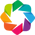

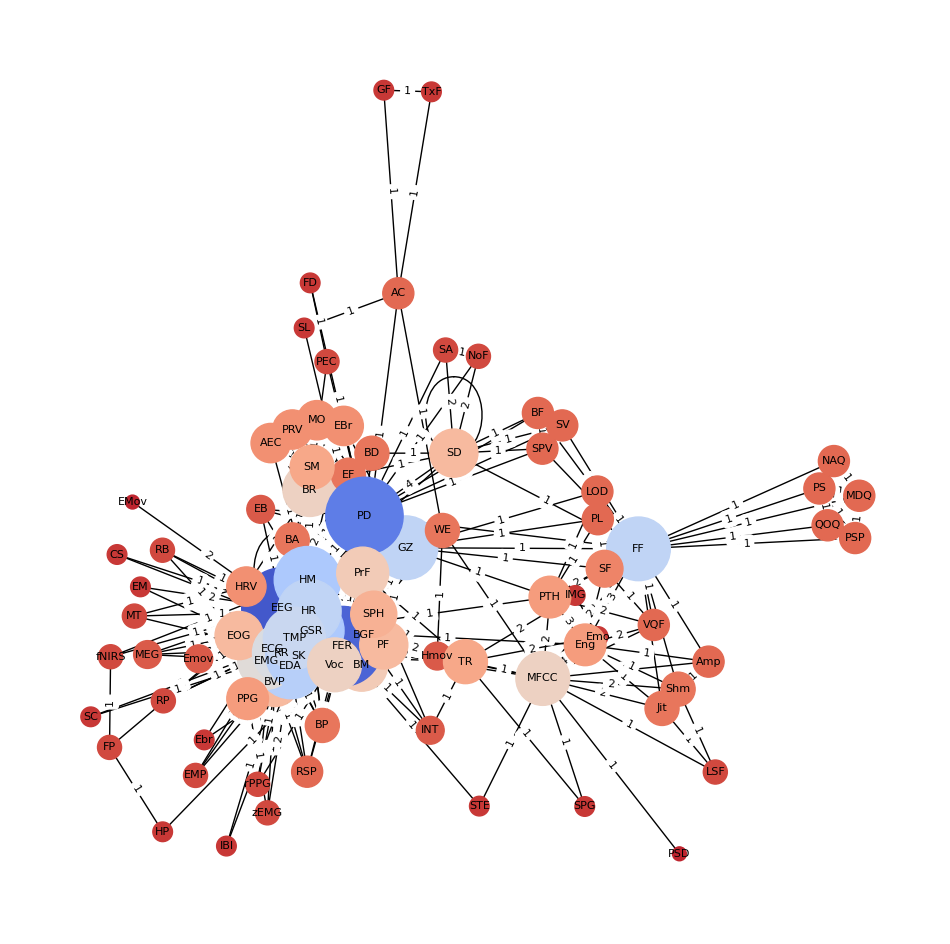

In [14]:
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from chord import Chord
import networkx as nx
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
hv.extension('bokeh')


df = pd.read_excel('dataset.xlsx')
data = df['Cues combination']

# Preprocess data
cues_combinations = [row.replace(' ', '').split(',') for row in data]
cues_combinations = [comb.split('+') for cues in cues_combinations for comb in cues]

# Calculate co-occurrence
co_occurrence = defaultdict(int)
for combination in cues_combinations:
    for pair in itertools.combinations(sorted(combination), 2):
        co_occurrence[pair] += 1

# Create co-occurrence matrix
unique_cues = sorted({cue for combination in cues_combinations for cue in combination})
co_occurrence_matrix = pd.DataFrame(index=unique_cues, columns=unique_cues).fillna(0)

for (cue1, cue2), count in co_occurrence.items():
    co_occurrence_matrix.at[cue1, cue2] = count
    co_occurrence_matrix.at[cue2, cue1] = count

# Filter co-occurrence matrix to include only terms that appear more than once
co_occurrence_matrix = co_occurrence_matrix.loc[(co_occurrence_matrix.sum(axis=1) > 1), (co_occurrence_matrix.sum(axis=0) > 1)]

# Create a graph from the co_occurrence_matrix
G = nx.from_pandas_adjacency(co_occurrence_matrix)

# Calculate the node degrees
degree = dict(G.degree)

# Set the node size based on the degree
node_size = [v * 100 for v in degree.values()]

# Create a color map for the nodes based on their degree
color_map = sns.color_palette("coolwarm_r", max(degree.values()) - min(degree.values()) + 1)

# Assign colors to nodes based on their degree
node_color = [color_map[v - min(degree.values())] for v in degree.values()]

# Draw the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 12))

# Draw nodes with customized size and color
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}, font_size=8)
plt.gca().set_frame_on(False)

plt.show()


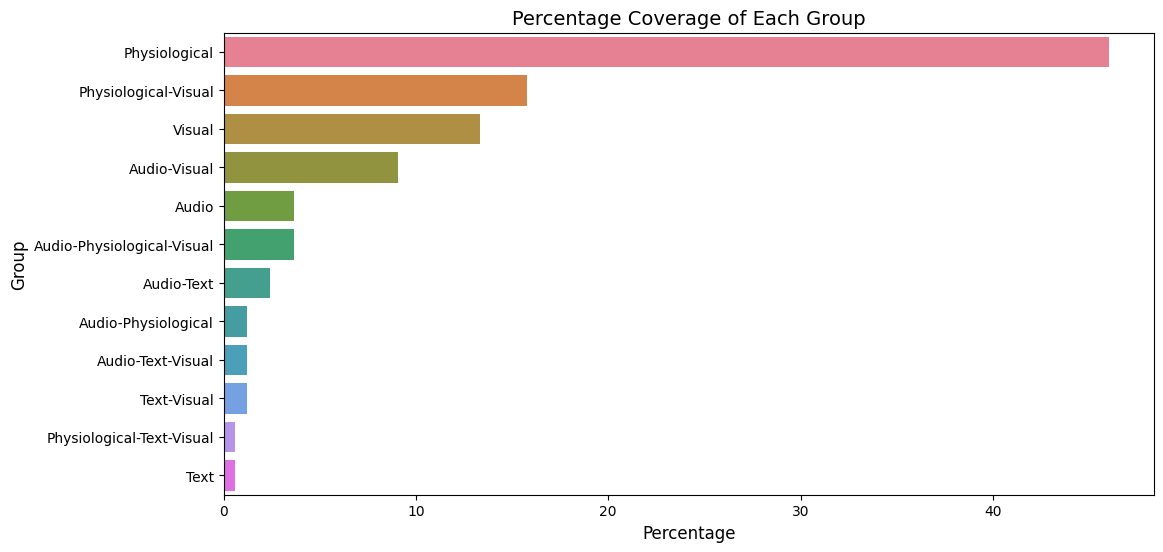

In [21]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

acronym_dictionary = {
    "EEG": "Physiological",
    "EDA": "Physiological",
    "ECG": "Physiological",
    "EMG": "Physiological",
    "PPG": "Physiological",
    "HR": "Physiological",
    "GSR": "Physiological",
    "EOG": "Physiological",
    "RB": "Physiological",
    "RR": "Physiological",
    "SK": "Physiological",
    "Th": "Physiological",
    "FNIS": "Physiological",
    "fMRI": "Physiological",
    "BVP": "Physiological",
    "TMP": "Physiological",
    "BP" : "Physiological",
    "rPPG":"Visual",
    "Sac": "Visual",
    "EF": "Visual",
    "PD": "Visual",
    "BLK": "Visual",
    "FER": "Visual",
    "EMov": "Visual",
    "PF": "Visual",
    "BGF": "Visual",
    "MEL": "Physiological",
    "VT": "Audio",
    "AR": "Audio",
    "MFCC": "Audio",
    "PSD": "Audio",
    "PrF": "Audio",
    "VQF": "Audio",
    "SF": "Audio",
    "PTH": "Audio",
    "INT": "Audio",
    "TON": "Audio",
    "TR": "Text",
    "WE": "Text",
    "LEX": "Text",
    "EGM":"Physiological",
    "OHS":"Text",
    "Prosodic Features":"Audio",
    "GA": "Visual",
    "BM":"Visual",
    "STE":"Audio",
    "EGA":"Physiological",
    "MPCC": "Audio",
    "IBI": "Physiological",
    "NoF": "Visual",
    "PRV": "Visual",
    "SPE": "Visual",
    "BR": "Visual",
    "BA": "Visual",
    "BD": "Visual",
    "FF": "Visual",
    "SA": "Visual",
    "SD": "Visual",
    "NoS": "Visual",
    "SV": "Visual",
    "SPV": "Visual",
    "GZ": "Visual",
    "PL": "Visual",
    "MO": "Visual",
    "EBr": "Visual",
    "WC": "Text",
    "GSS": "Audio",
    "Jit": "Audio",
    "Shm": "Audio",
    "Amp": "Audio",
    "Eng": "Audio",
    "LSF": "Audio",
    "AC": "Audio",
    "TxF": "Visual",
    "GF": "Visual",
    "SL": "Text",
    "MEG": "Physiological",
    "Voc": "Audio",
    "HRV": "Physiological",
    "MT": "Physiological",
    "HMov": "Visual",
    "FP": "Physiological",
    "HP": "Visual",
    "SPH": "Audio",
    "IMG": "Visual",
    "SPG": "Audio",
    "zEMG": "Physiological"
}

group_definitions = {
    "AF+CPS": "Audio-physiological",
    "ATF": "Audio-text",
    "AVF": "Audio-visual",
    "AVF+CPS": "Audio-visual-physiological",
    "CPS": "Multiple physiological",
    "VF+CPS": "Visual-physiological",
    "VATF": "Visual-audio-text",
    "VATF+CPS": "Visual-audio-text-physiological",
    "VF":"Visual",
    "VF+TF+CPS": "Visual-Text-Physiological",
    "VF+TR": "Visual-Text"

}


def assign_label(combo):
    categories = set()
    for feature in combo.split('+'):
        if feature in acronym_dictionary:
            categories.add(acronym_dictionary[feature])

    if len(categories) == 1:
        return list(categories)[0]
    else:
        return '-'.join(sorted(categories))
    
df = pd.read_excel('dataset.xlsx')
# Extract unique combinations from 'Cues combination' column
combinations = set()
for combo_str in df['Cues combination']:
    combos = combo_str.split(',')
    for combo in combos:
        combo = '+'.join(sorted(combo.strip().split('+')))
        combinations.add(combo)

# Create a new DataFrame with the unique combinations
unique_combinations_df = pd.DataFrame(list(combinations), columns=['Cues combination'])

unique_combinations_df['Label'] = unique_combinations_df['Cues combination'].apply(assign_label)
# Group 'Cues combination' by 'Label'
grouped_combinations = unique_combinations_df.groupby('Label')['Cues combination'].apply(list)

# Create a new DataFrame for the grouped data
grouped_combinations_df = pd.DataFrame(grouped_combinations).reset_index()
# Remove square brackets and apostrophes from the 'Cues combination' column
grouped_combinations_df['Cues combination'] = grouped_combinations_df['Cues combination'].apply(lambda x: ', '.join(x))

# Save the DataFrame to an Excel file
grouped_combinations_df.to_excel('group_combination.xlsx', index=False)

# Read the group_combination.xlsx file
grouped_combinations_df = pd.read_excel('group_combination.xlsx')

# Calculate the percentage coverage of each group
grouped_combinations_df['Coverage'] = grouped_combinations_df['Cues combination'].apply(lambda x: len(x.split(', ')))
grouped_combinations_df['Percentage'] = (grouped_combinations_df['Coverage'] / grouped_combinations_df['Coverage'].sum()) * 100

# Sort the DataFrame by increasing percentage
grouped_combinations_df = grouped_combinations_df.sort_values('Percentage', ascending=False)

# Set the color palette
palette = sns.color_palette("husl", n_colors=len(grouped_combinations_df))

# Plot the horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='Label', data=grouped_combinations_df, palette=palette)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Group', fontsize=12)
plt.title('Percentage Coverage of Each Group', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()


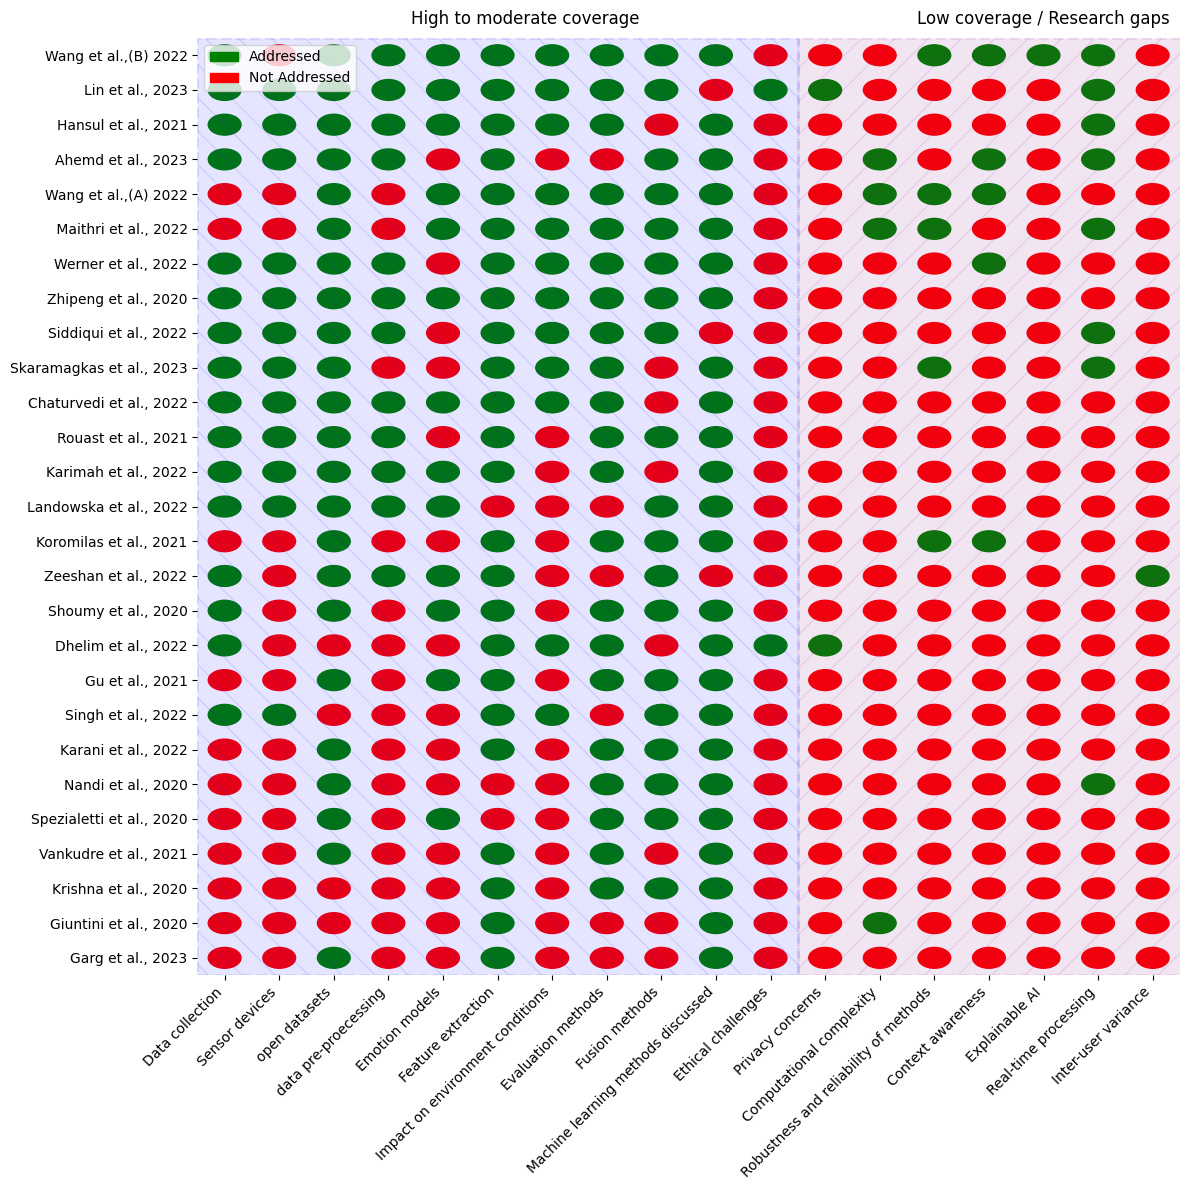

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

df = pd.read_excel('dataset.xlsx')
df = df.drop(columns=['MMF', 'Main Cues', 'General (G)/Specific (S)', 'Text', 'Visual', 'Audio', 'Physiological', 'Cues combination'])

# Sort the DataFrame by the sum of 1's in each row
df['total_ones'] = df.iloc[:, 1:].sum(axis=1)
df = df.sort_values(by='total_ones', ascending=True).reset_index(drop=True)
df = df.drop(columns=['total_ones'])

fig, ax = plt.subplots(figsize=(12, 12))

# Plot circles for each metric in every study, colored green for '1' and red for '0'
for row, study in enumerate(df['Study']):
    for col, metric in enumerate(df.columns[1:]):
        value = df.loc[row, metric]
        color = 'green' if value == 1 else 'red'
        circle = plt.Circle((col, row), 0.3, color=color, linewidth=1, edgecolor='black')
        ax.add_artist(circle)

# Set the axis labels
ax.set_xticks(np.arange(len(df.columns[1:])))
ax.set_yticks(np.arange(len(df['Study'])))

ax.set_xticklabels(df.columns[1:], rotation=45, ha='right')
ax.set_yticklabels(df['Study'])

# Add custom legend for red and green circles
green_circle = plt.Circle((0, 0), 0.3, color='green', linewidth=1, edgecolor='black')
red_circle = plt.Circle((0, 0), 0.3, color='red', linewidth=1, edgecolor='black')
ax.legend([green_circle, red_circle], ['Addressed', 'Not Addressed'], loc='upper left')

# Add bounding boxes
start_ethical_challenges = df.columns.get_loc('Ethical challenges')
start_data_collection = 0

ax.add_patch(plt.Rectangle((start_ethical_challenges - 0.5, -0.5), len(df.columns) - start_ethical_challenges, len(df['Study']), linewidth=2, edgecolor='purple', facecolor='purple', alpha=0.1, linestyle='dashed', hatch='/'))
ax.add_patch(plt.Rectangle((start_data_collection - 0.5, -0.5), start_ethical_challenges - start_data_collection, len(df['Study']), linewidth=2, edgecolor='blue', facecolor='blue', alpha=0.1, linestyle='dashed', hatch='\\'))

# Add bounding box labels
ax.annotate('Low coverage / Research gaps', (start_ethical_challenges + (len(df.columns) - start_ethical_challenges) / 2, 
                              len(df['Study']) - 0.5), textcoords="offset points", xytext=(0, 10), ha='center', 
            fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
ax.annotate('High to moderate coverage', (start_data_collection + (start_ethical_challenges - start_data_collection) / 2, 
                                          len(df['Study']) - 0.5), textcoords="offset points", xytext=(0, 10), ha='center',
            fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# Adjust the plot limits
ax.set_xlim(left=-0.5, right=len(df.columns[1:]) - 0.5)
ax.set_ylim(bottom=-0.5, top=len(df['Study']) - 0.5)

# Remove the default border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the margins
ax.margins(x=0.1, y=0.05)

plt.tight_layout()
plt.show()




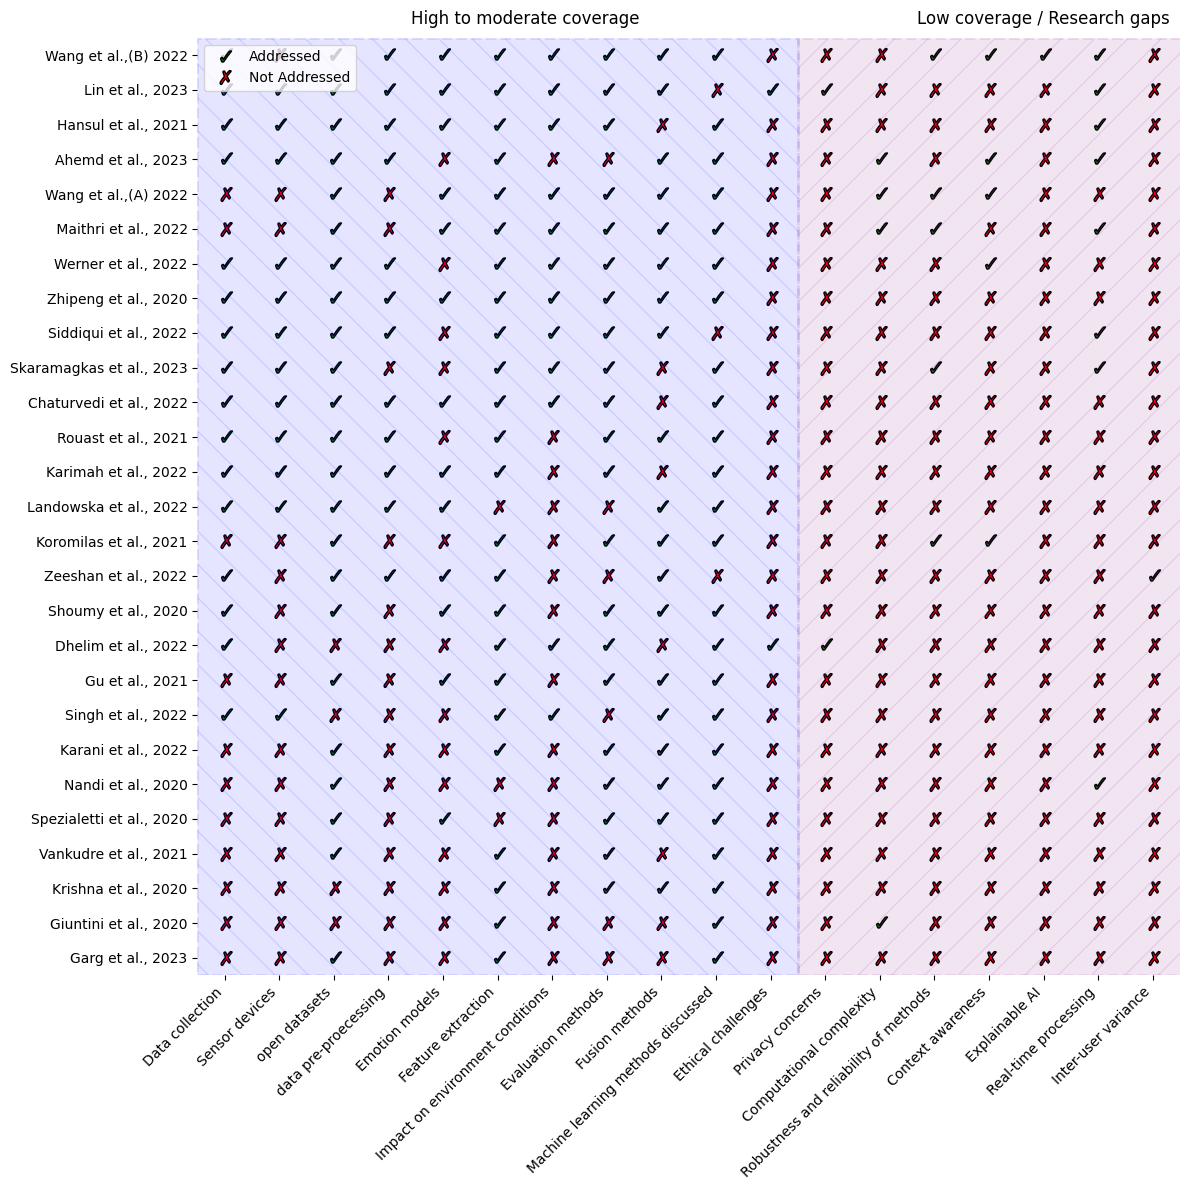

In [59]:
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

df = pd.read_excel('dataset.xlsx')
df = df.drop(columns=['MMF', 'Main Cues', 'General (G)/Specific (S)', 'Text', 'Visual', 'Audio', 'Physiological', 'Cues combination'])

# Sort the DataFrame by the sum of 1's in each row
df['total_ones'] = df.iloc[:, 1:].sum(axis=1)
df = df.sort_values(by='total_ones', ascending=True).reset_index(drop=True)
df = df.drop(columns=['total_ones'])

fig, ax = plt.subplots(figsize=(12, 12))

# Plot check and cross symbols for each metric in every study, colored green for '1' and red for '0'
for row, study in enumerate(df['Study']):
    for col, metric in enumerate(df.columns[1:]):
        value = df.loc[row, metric]
        color = 'green' if value == 1 else 'red'
        marker = '$✓$' if value == 1 else '$✗$'
        ax.scatter(col, row, c=color, marker=marker, s=100, linewidth=1, edgecolor='black')

# Set the axis labels
ax.set_xticks(np.arange(len(df.columns[1:])))
ax.set_yticks(np.arange(len(df['Study'])))

ax.set_xticklabels(df.columns[1:], rotation=45, ha='right')
ax.set_yticklabels(df['Study'])

# Add custom legend for green check and red cross symbols
green_check = Line2D([0], [0], marker='$✓$', color='green', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black')
red_cross = Line2D([0], [0], marker='$✗$', color='red', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black')
ax.legend([green_check, red_cross], ['Addressed', 'Not Addressed'], loc='upper left')

# Add bounding boxes
start_ethical_challenges = df.columns.get_loc('Ethical challenges')
start_data_collection = 0

ax.add_patch(plt.Rectangle((start_ethical_challenges - 0.5, -0.5), len(df.columns) - start_ethical_challenges, len(df['Study']), linewidth=2, edgecolor='purple', facecolor='purple', alpha=0.1, linestyle='dashed', hatch='/'))
ax.add_patch(plt.Rectangle((start_data_collection - 0.5, -0.5), start_ethical_challenges - start_data_collection, len(df['Study']), linewidth=2, edgecolor='blue', facecolor='blue', alpha=0.1, linestyle='dashed', hatch='\\'))

# Add bounding box labels
ax.annotate('Low coverage / Research gaps', (start_ethical_challenges + (len(df.columns) - start_ethical_challenges) / 2, 
                              len(df['Study']) - 0.5), textcoords="offset points", xytext=(0, 10), ha='center', 
            fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
ax.annotate('High to moderate coverage', (start_data_collection + (start_ethical_challenges - start_data_collection) / 2, 
                                          len(df['Study']) - 0.5), textcoords="offset points", xytext=(0, 10), ha='center',
            fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# Adjust the plot limits
ax.set_xlim(left=-0.5, right=len(df.columns[1:]) - 0.5)
ax.set_ylim(bottom=-0.5, top=len(df['Study']) - 0.5)

# Remove the default border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the margins
ax.margins(x=0.1, y=0.05)

plt.tight_layout()
plt.show()


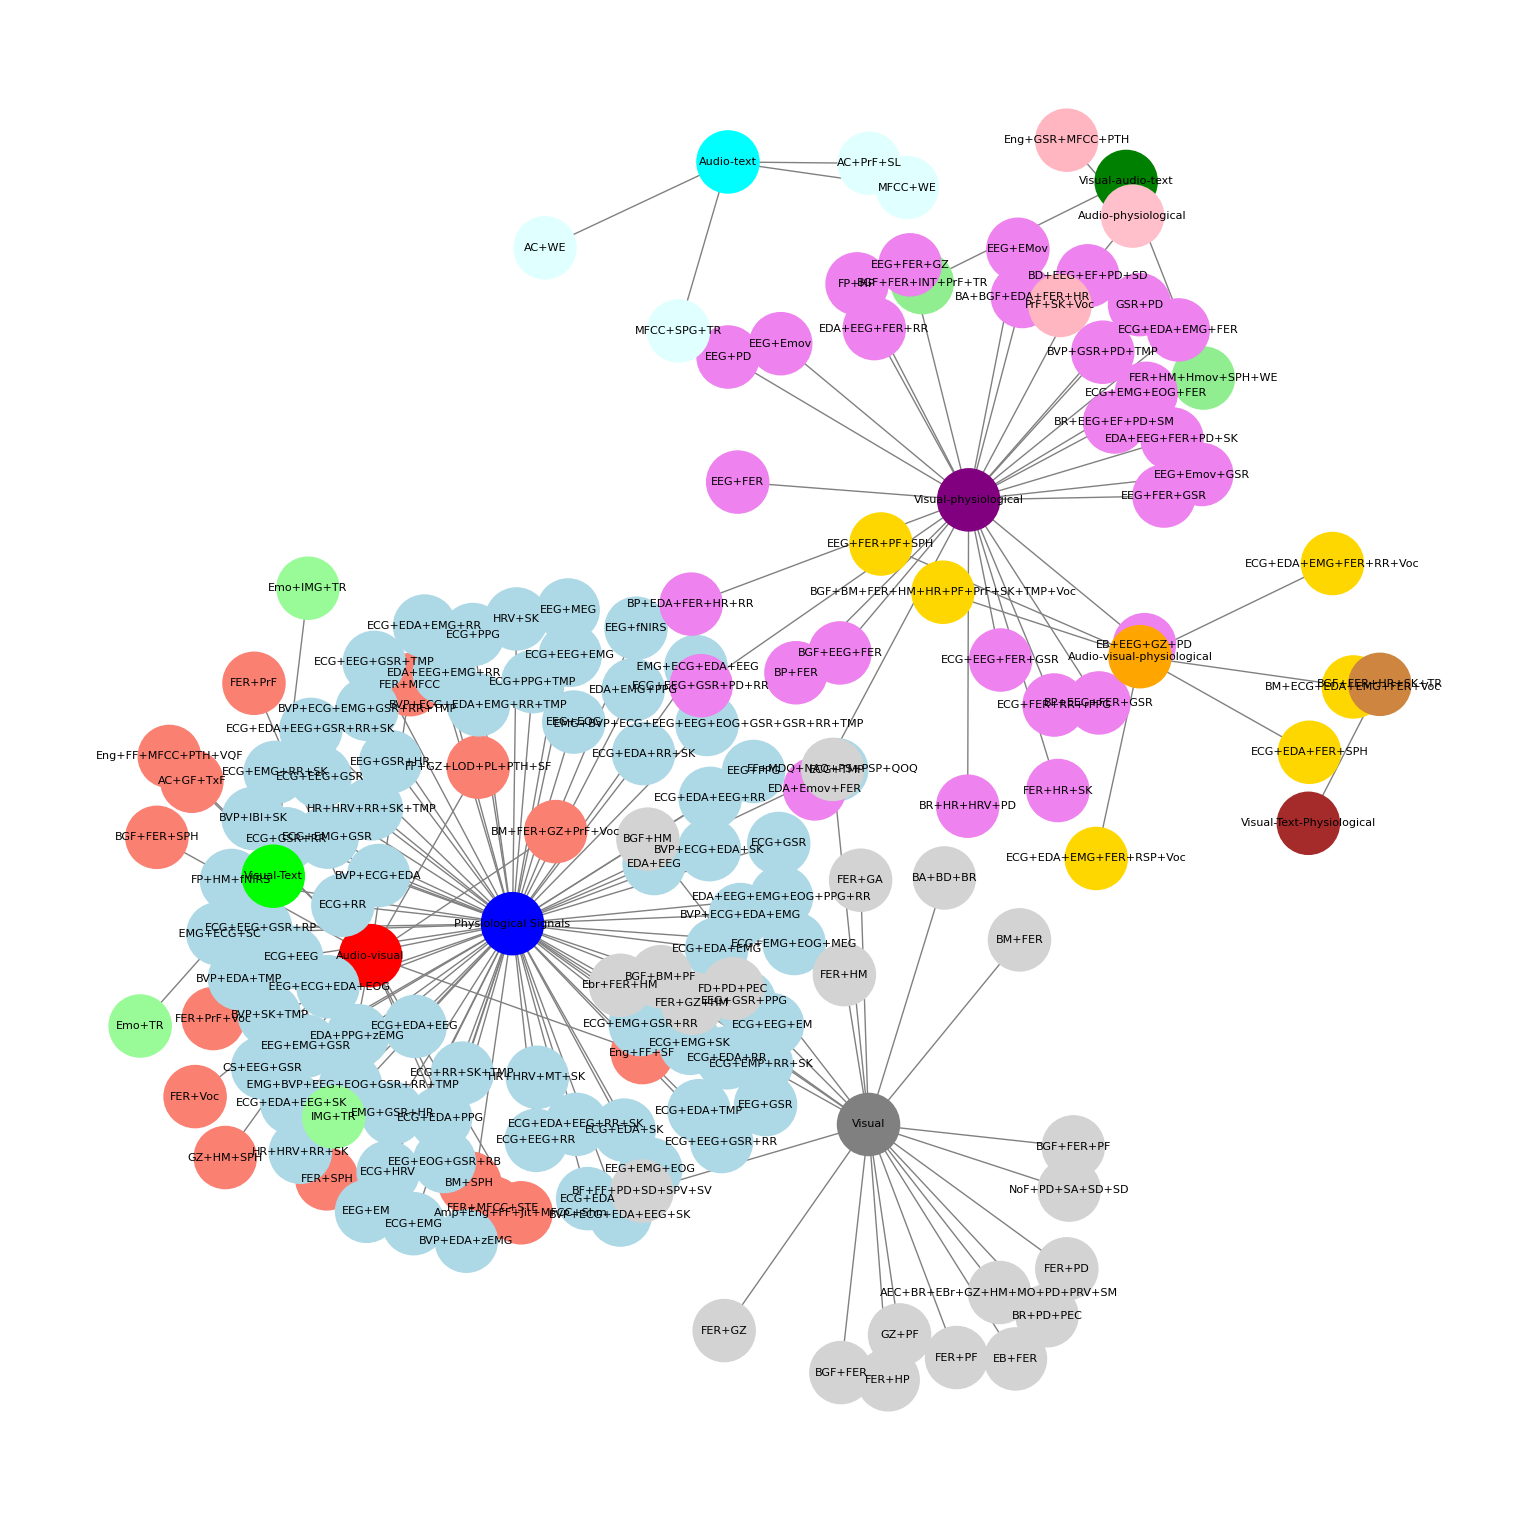

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_excel('modality_groups.xlsx')
G = nx.Graph()

color_map = {
    'Audio-visual': {'central': 'red', 'group': 'salmon'},
    'Physiological Signals': {'central': 'blue', 'group': 'lightblue'},
    'Visual-audio-text': {'central': 'green', 'group': 'lightgreen'},
    'Visual-physiological': {'central': 'purple', 'group': 'violet'},
    'Audio-visual-physiological': {'central': 'orange', 'group': 'gold'},
    'Audio-text': {'central': 'cyan', 'group': 'lightcyan'},
    'Visual-audio-text-physiological': {'central': 'yellow', 'group': 'khaki'},
    'Audio-physiological': {'central': 'pink', 'group': 'lightpink'},
    'Visual': {'central': 'gray', 'group': 'lightgray'},
    'Visual-Text-Physiological': {'central': 'brown', 'group': 'peru'},
    'Visual-Text': {'central': 'lime', 'group': 'palegreen'}
}

for index, row in df.iterrows():
    modality_combination = row['Modality Combination']
    cue_combinations = row['Cue combination'].split(', ')
    
    G.add_node(modality_combination, node_type='central', color=color_map[modality_combination]['central'])
    
    for cue_combination in cue_combinations:
        G.add_node(cue_combination, node_type='group', color=color_map[modality_combination]['group'])
        G.add_edge(modality_combination, cue_combination)

# Function to assign colors based on node type
def assign_colors(G):
    colors = []
    for node in G.nodes(data=True):
        colors.append(node[1]['color'])
    return colors

node_colors = assign_colors(G)

# Visualize the network graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.3, seed=42)
nx.draw(G, pos, with_labels=False, node_size=2000, font_size=8, node_color=node_colors, edge_color="gray")
labels = nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.show()
